# Visualization Practice
## 과제 안내 
- 이번 실습은 "titanic.csv" 파일이 필요합니다. 과제 공지 폴더를 확인해주세요.
- 답안을 작성하여 ipynb 파일로 구글 드라이브 \[Assignment\] - \[개인 폴더\]로 업로드하시면 됩니다.  
- 출력 예시는 각 셀 하단에 수록되어 있습니다.
- 출력 결과와 예시가 완전히 일치할 필요는 없습니다! 문제의 조건에만 부합하면 됩니다.

# Practice Introduction
주어지는 Dataset은 Kaggle의 "[Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)" Competition에서 사용하는 것입니다.  
위 경진은 타이타닉 탑승자의 데이터 셋을 바탕으로 생존자를 예측하는 것이 목표입니다.  
이번 Practice에서는 위 Dataset을 EDA(탐색적 데이터 분석)을 해보는 시간을 가집니다.  

분석 흐름은 아래와 같습니다.  
1. 데이터셋 불러오기 및 확인: 주어진 Dataset을 불러오고 Null Data가 있는지 확인하는 등 데이터 분석을 위한 준비를 합니다.  
2. EDA: 각 Feature를 분석하고, Feature들 간의 상관관계도 분석해봅시다. **이 과정에서 시각화(Visualization)를 적극 사용합니다.** 



# Practice

In [194]:
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

# PreProcessing
본격적으로 분석하기 전 데이터를 ***전처리*** 해봅시다. 

## P.3-1
Dataset을 판다스로 불러옵니다.  
불러온 Dataset 이름은 df_titanic으로 해주세요.


In [195]:
### P.1-1 Write your answer here

###
print(df_titanic)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ..

## P.3-2-1
df_titanic이 어떻게 구성되었는지 살펴봅시다.  
우선 df_titanic의 상위 15개 데이터를 살펴봅시다. (head 사용)  
각 데이터가 의미하는 뜻은 [링크](https://www.kaggle.com/c/titanic/data)에서 확인할 수 있습니다.

In [196]:
### P.3-2-1

###

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## P.3-2-2
info()를 사용하여 df_titanic의 정보도 출력해 봅시다.
##

In [197]:
### P.3-2-2

###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## P.3-3
각 Column별 데이터 개수를 살펴보면 균등하지 않음을 알 수 있습니다.  
여기서 null data가 있을 것이라 추측해 볼 수 있습니다.
null data를 그대로 분석에 활용할 수는 없습니다. 따라서 데이터 전처리에서 null data를 처리하는 것은 매우 중요합니다.  
df_titanic에 null data가 있는지 확인해 봅시다.  
Column 별 null data의 개수를 cnt_null에 저장해 봅시다.

In [198]:
### P.3-3

###
print(cnt_null)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## P.3-4
Missingno 라이브러리를 활용하면 null data를 쉽게 시각화 할 수 있습니다.  
라이브러리는 이미 상단에서 임포트하였습니다.  
[링크](https://datascienceschool.net/view-notebook/8cbbdd4daaf84c0492d440b9a819c8be/)를 참고하여 
null data를 matrix로 시각화하여 봅시다. 


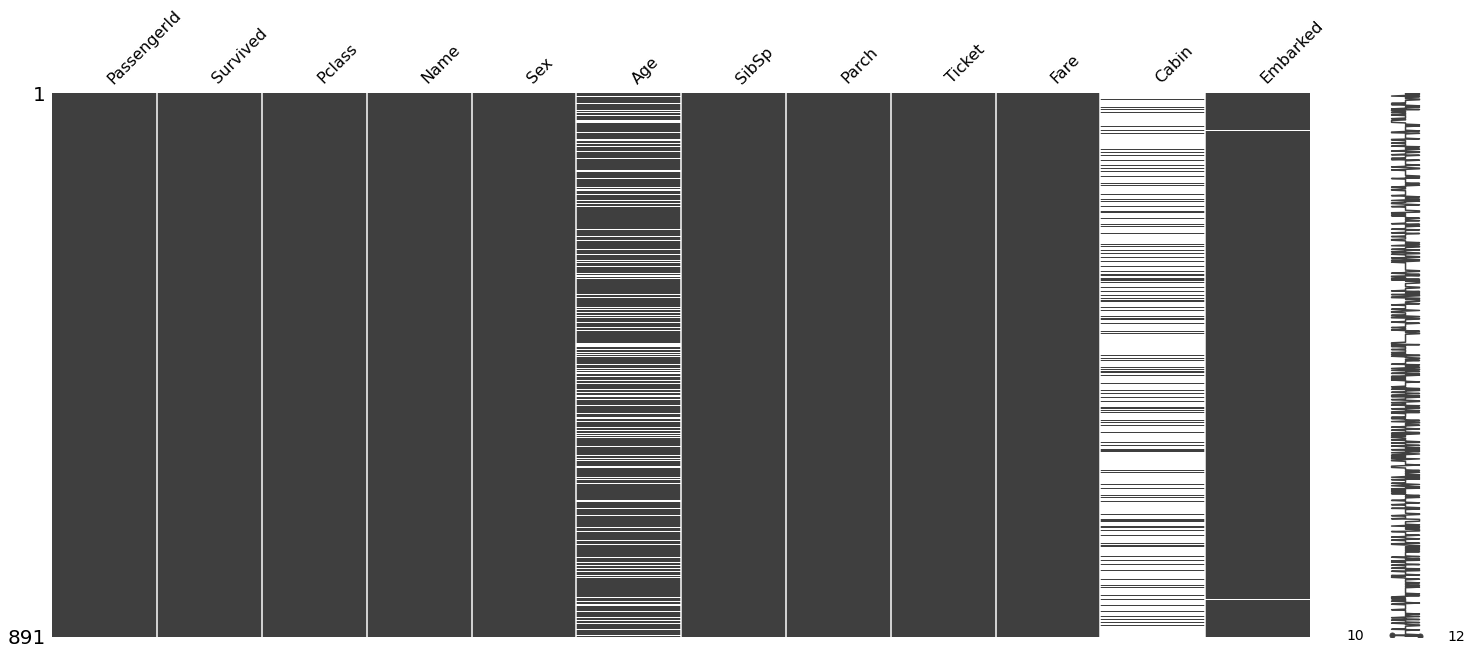

In [199]:
### P.3-4

###

## P.3-5
위 과정을 통해 Age, Cabin 그리고 Embarked에 null data가 있음을 확인했습니다.  
이 중에서 Cabin Column은 대다수가 null data임을 알 수 있습니다.  
null data가 너무 많은 Column은 분석에 활용할 수 없습니다.  
따라서 Cabin Column은 삭제해 봅시다.

In [200]:
### P.3-5

###
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### P.3-5 Comment
나머지 두 Age와 Embarked Column의 null data는 어떻게 처리할 수 있을까요?  
물론, null data가 포함된 행을 지우는 방법도 있습니다.  
하지만 이같은 방법은 데이터의 손실이 일어나고 이는 부정확한 분석의 원인이 됩니다. 따라서 null data가 포함된 행이 많을 때는 권장하지 않는 방법입니다.

결측치 처리는 아래 링크도 참고해보세요!
[결측치 처리 방법](https://m.blog.naver.com/youji4ever/221690373437)  

두 Column은 데이터를 좀 더 분석한 뒤 결측치 처리를 어떻게 할지 판단해보겠습니다. 

## P.3-6
각 Column들은 탑승자 각각의 Feature라고 할 수 있습니다.  
이제 이들 각각의 Feature들을 분석해 보겠습니다.  

먼저 Survived의 생존자/사망자 수를 확인해 봅시다.
1. cnt_survived에 생존자/사망자 수를 저장합니다. 
2. 저장할 때 index를   
(value_counts 사용), (0은 사망, 1은 생존)

In [201]:
### P.3-6

###
print(cnt_survived)

0    549
1    342
Name: Survived, dtype: int64


## P.3-7
위에서 구한 cnt_survived를 바탕으로 생존자/사망자 비율을 나타내는 파이 그래프(Pie Graph)를 그려봅시다.  
이때 그래프에 적절한 **제목** 과 **범례** 를 출력하도록 해봅시다.

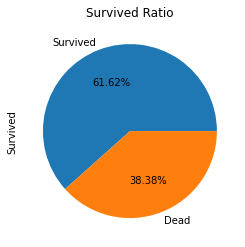

In [202]:
### P.3-7

###

# EDA
각 feature들의 정보와 관계들을 분석하여 데이터에 대한 Insight를 도출해 봅시다.  
이를 통해 Survived를 예측하기에 유의미한 Feature가 무엇인지 생각해봅시다.   

## P.3-8
첫번째로 P_class Feature를 살펴봅시다.  
p_class는 사회 경제적 지위를 의미하며, 1에 가까울 수록 높은 지위입니다.  
우선 P_class 별 인원수를 출력해봅시다.  
그 결과는 cnt_pclass에 저장해주세요.
##

In [206]:
### P.3-8

###
print(cnt_pclass)

Survived
Pclass          
1            216
2            184
3            491


## P.3-8-2
P_class 별 인원수를 막대 그래프로 시각화하여 봅시다.

### Tips!
Seaborn의 Countplot을 이용하면 간단하게 그릴 수 있습니다.

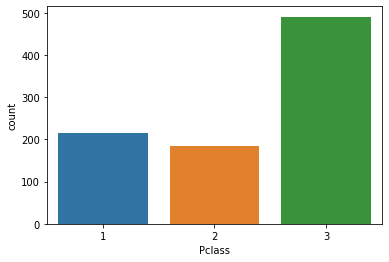

In [207]:
### P.3-8-2

###

## P.3-9
위에서는 P_class 별 인원수를 구했다면,  
이번에는 P_class 별 생존자 인원 수를 구해봅시다.  
그 결과를 cnt_pclass_survived 에 저장해주세요.

In [208]:
### P.3-9

###
print(cnt_pclass_survived)

Survived
Pclass          
1            136
2             87
3            119


## P.3-10
이제 P_class 별 생존률을 구하고 이를 막대 그래프로 시각화하여 봅시다.
이때 ***막대를 원하는 색으로 지정*** 해봅시다.
### Tips!
- 생존률은 cnt_pclass와 cnt_pclass_survived를 이용하여 쉽게 구할 수 있습니다.
- 색상 목록은 [링크](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)를 참조해주세요.  
- matplotlib는 cmap이라 하여 색상 조합을 제공합니다. 이를 활용하면 일일이 특성마다 색상을 지정할 필요 없이 누군가가 이미 만들어둔 색상 조합을 사용할 수 있습니다.

In [4]:
### P.3-10

###


## P.3-10 Comment
P_Class의 정보와 Survived 와의 관계를 시각화하여 알아보았습니다.  
P_Class와 Survived가 관련이 있을까요? 한번 직접 생각해 봅시다!

## P.3-11-참고
범주형 Feature 간의 관계는 교차표(Cross Table)를 사용하여 간단하게 표현할 수도 있습니다.  
교차표를 사용하여 Pclass와 Survived의 관계를 시각화하여 봅시다.
### Tips
- 통계학에서 자료의 형태는 다음 [링크](https://m.blog.naver.com/PostView.nhn?blogId=khyunji90&logNo=220166480550&proxyReferer=https:%2F%2Fwww.google.com%2F)를 참고해주세요. (범주형 VS 수치형)

In [210]:
### P.3-11

###

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


## P.3-12
이번에는 Sex Feature를 살펴봅시다.  
P_class처럼 성별의 비율과 각 성별 별 생존률 파이 그래프를 그려 성별과 생존이 관련이 있을지 알아봅시다.  
1. 승객 중 남/녀 성별의 비율 파이 그래프  
2. 남성의 생존자/사망자 비율 파이 그래프  
3. 여성의 생존자/사망자 비율 파이 그래프  
총 3개의 파이 그래프를 다단으로 그립니다. (subplot 이용, 배치는 자유입니다!)


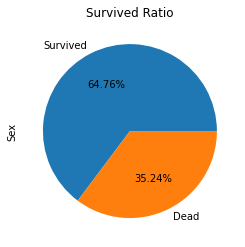

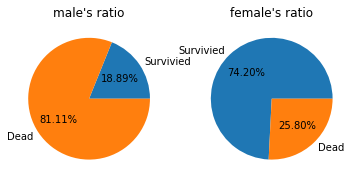

In [212]:
### P.3-12


###

## P.3-12 Comment
성별이 생존률과 관련이 있을까요? 한번 생각해봅시다! 

## P.3-13 
이제 PClass, Sex 두 Feature가 생존(Survived)에 영향을 주는지 알아봅시다!  
Seaborn의 factorplot을 이용하면 다차원의 데이터를 시각화 할 수 있습니다. 
x축이 Pclass, y축이 Survived, hue가 Sex인 막대 그래프를 그려봅시다. (factorplot 사용) 

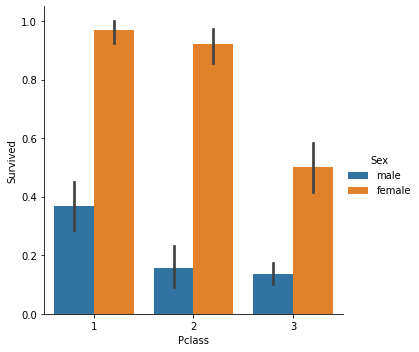

In [213]:
### P.3-13

###

## P.3-13 Comment
Pclass와 Sex가 생존률과 관련이 있을까요?

## P.3-14
이번에는 Age Feature를 살펴보겠습니다.
Age는 수치형 데이터입니다. 따라서 밀도 그래프로 분포를 확인해 보겠습니다.  
Age별 생존자와 사망자 분포를 밀도 그래프로 나타내봅시다. (kdeplot 사용) (Kdeplot, Kernel Density Estimate)  
1. 나이별 생존자 분포  
2. 나이별 사망자 분포  
두 plot을 한 grid에 그려봅시다. 이때 각 plot이 어떤 정보를 나타내는지 알기 쉽게 범례도 추가합시다.

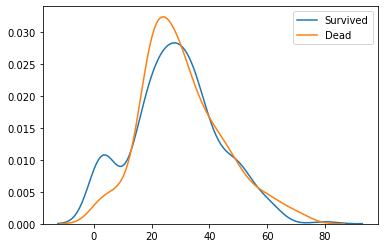

In [215]:
### P.3-14

###

## P.3-15 Advanced
위 그래프를 통해 나이가 젊을 수록 생존률이 높을 것이라고 추측해 볼 수 있습니다.
그럼 이제 나이별 생존률은 어떻게 되는지 알아봅시다.


### Tips!
나이별 생존률을 어떻게 구할 수 있을까요?  
우선 각 나이별로 데이터가 충분히 많지 않기 때문에 나이 각각의 생존률을 구하면 원하는 결과를 얻을 수 없습니다.  
따라서 나이를 적절한 구간별 묶어 (5살 간격, 10살 간격 등) 처리하여야 합니다!  

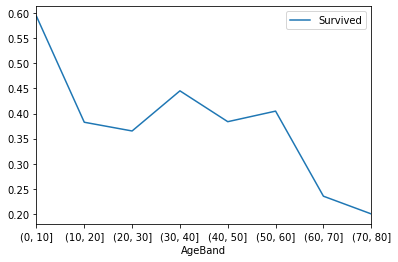

In [216]:
### P.3-15

###

## P.3-15 Comment
Age가 생존률과 관계가 있을까요?

## P.3-16
마지막으로 Sex와 Age가 생존률에 영향을 미쳤을지, 그리고 Pclass와 Age가 생존률에 영향을 미쳤을지 알아봅시다. 
x를 Pclass 또는 Sex, y를 Age, Hue를 Survived로 하는 두 개의 Plot을 그려봅시다! (violinplot 사용)


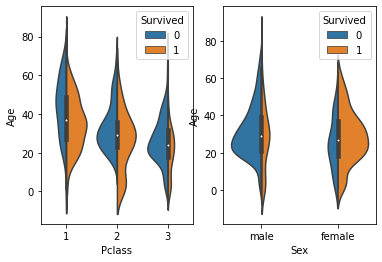

In [217]:
### P.3-16

###

## P.3-FREE
지금까지 데이터 전처리와 EBA를 실습해 보았습니다.
수고 많으셨습니다!
마지막 문제는 자유 문제입니다. 아직 진행/분석하지 않은 정보들이 많이 있습니다. 이들 중 하나를 자유롭게 분석/시각화 해보시면 됩니다.
### Example
1. Age, Embarked의 Null data 처리하기
2. 아직 분석하지 않은 Feature(Emabarked, Family 등) 분석/시각화해보기
3. 지금까지 분석/시각화한 Feature(Age, Sex 등) 다른 방법으로 분석해보기  

## Next Practice
다음 시간에는 예측(Prediction)의 일종인 분류(Classification)에 대해 배웁니다. 이것을 배우고 나면 승객 정보가 주어졌을 때 생존 여부를 판단할 수 있는 모델을 직접 만들 수 있습니다.  


수고많으셨습니다! 다음 시간에 뵙겠습니다.


In [193]:
### P.3-FREE
###